## Problem Statement:
    
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands?


Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Objective:
    
Need to model the demand for shared bikes with the available independent variables. 
It will be used by the management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [1]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Importing dataset

bike = pd.read_csv(r'C:\Users\91990\Desktop\Data_Science\Mchine_Learning\MachineLearningAssignment\day.csv')

In [4]:
# let us see few records
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Let us see number of rows and columns

bike.shape

(730, 16)

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Let us see if there are any null fields.

bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### The above shows that all the fields are non-null with total number of records equal to 730

### Observations: 

1. instant variable is an index column so we can drop it as it is not useful for the analysis.
2. Columns dteday and yr/month/weekday are having same data so we can drop dteday.
3. For our analysis cnt is the target variable whereas there are two more columns casual count and registered count which we will not consider so we can drop them.

In [5]:
# Drop the unnecessary columns from bike dataset
bike = bike.drop(columns = ['instant','dteday','casual','registered'],axis=1)

### Observations/ suggestions :
Few of the columns naming convention can be changed to a more appropriate names as below :
1. yr -> year
2. mnth -> month
3. weathersit -> weather_condition
4. hum -> humidity
5. atemp -> heat_index
6. cnt -> count


In [6]:
# Renaming the columns
bike.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count','weathersit':'weather_condition','atemp':'heat_index'}, inplace = True) 
bike.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,heat_index,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Check values for few fields which are categorical variables.

In [9]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [7]:
# As season values are categorical so let us change to the names given in data dictionary which will be used for modelling

bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [8]:
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# The values of year is binary so no need to change it.
bike.year.value_counts()

1    365
0    365
Name: year, dtype: int64

In [12]:
bike.month.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: month, dtype: int64

In [9]:
# As month values are categorical so let us change to the month names which will be used for modelling

bike.month.replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',
                              10:'Oct',11:'Nov',12:'Dec'},inplace = True)

In [13]:
bike.month.value_counts()

July    62
Mar     62
Dec     62
Aug     62
May     62
Oct     62
Jan     62
Apr     60
Sep     60
June    60
Nov     60
Feb     56
Name: month, dtype: int64

In [43]:
# As weather condition values are categorical so let us change to the names given in data dictionary which will be used for modelling
bike.weather_condition.value_counts()

1    463
2    246
3     21
Name: weather_condition, dtype: int64

In [10]:
bike.weather_condition.replace({1: 'Clear + Few Clouds',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'},inplace= True)

In [16]:
bike.weather_condition.value_counts()

Clear + Few Clouds    463
Mist + Cloudy         246
Light Snow             21
Name: weather_condition, dtype: int64

In [21]:
# The values of holiday is binary so no need to change it.

bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [18]:
bike.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [11]:
# As season values are categorical so let us change to the day names which will be used for modelling
bike.weekday.replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'},inplace = True)

In [46]:
bike.weekday.value_counts()

Tue    105
Mon    105
Wed    104
Sun    104
Thu    104
Sat    104
Fri    104
Name: weekday, dtype: int64

In [12]:
# The values of working day is binary so no need to change it.
bike.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [23]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             730 non-null    object 
 1   year               730 non-null    int64  
 2   month              730 non-null    object 
 3   holiday            730 non-null    int64  
 4   weekday            730 non-null    object 
 5   workingday         730 non-null    int64  
 6   weather_condition  730 non-null    object 
 7   temp               730 non-null    float64
 8   heat_index         730 non-null    float64
 9   humidity           730 non-null    float64
 10  windspeed          730 non-null    float64
 11  count              730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Visualising Numerical variables

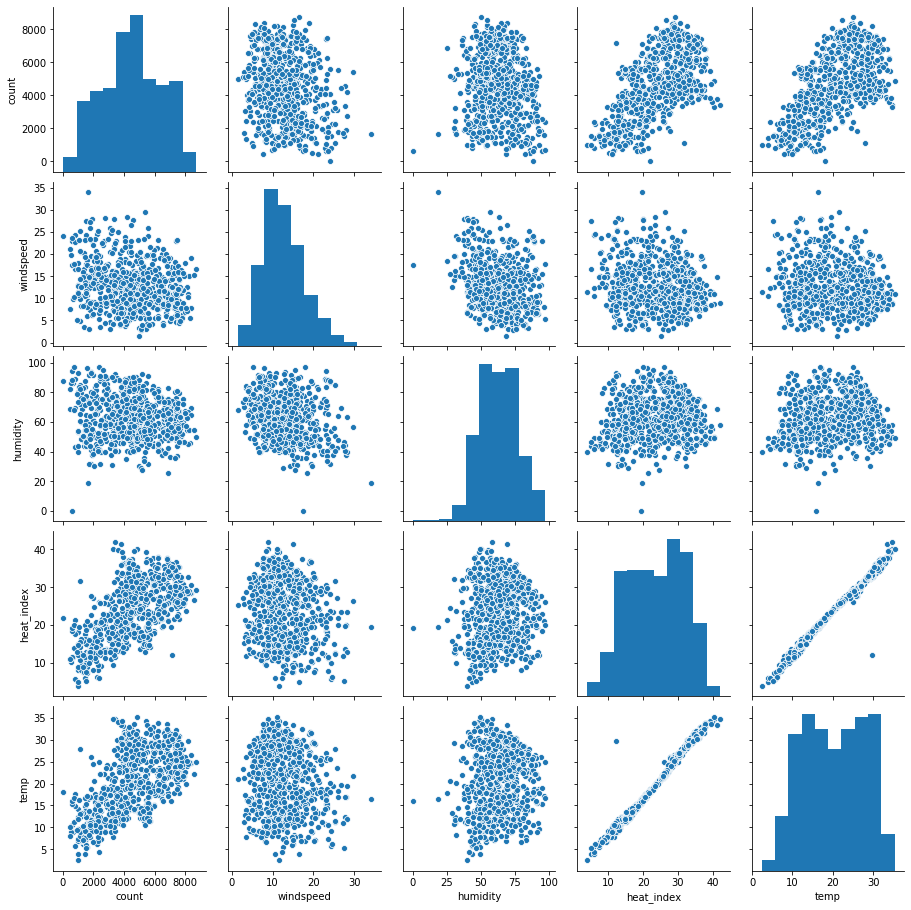

In [24]:
sns.pairplot(bike, vars=['count','windspeed', 'humidity', 'heat_index','temp'])
plt.show()


Observations: 
Target variable count is having good co-relation with temp and heat_index columns.Also there is a high co-relation between heat_index and temp variables.

## Visualising Categorical variables

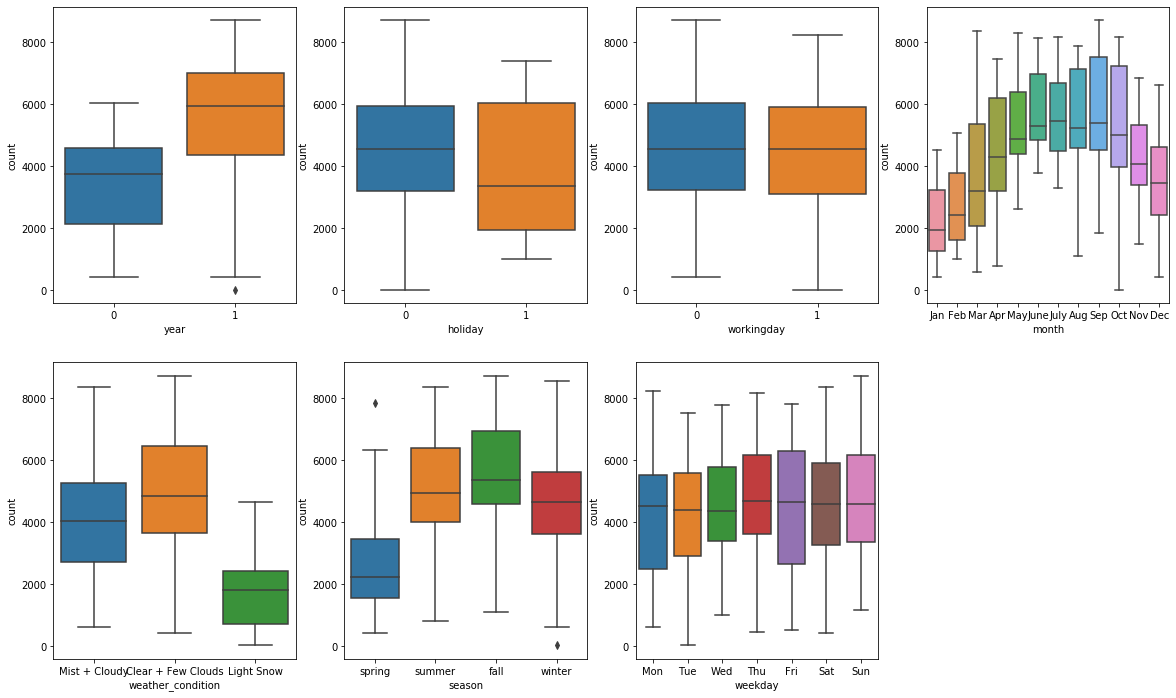

In [25]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)

plt.subplot(2,4,5)
sns.boxplot(x = 'weather_condition', y = 'count', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)

plt.show()

## Observations

1. Bike rentals demand has increased in the year 2019 from 2018.
2. Bike rentals are more during the Fall season and then in summer.
3. Bike rentals are more during clear weather or in partly cloudy weather. Demand is less during snowy weather.
4. Bike rentals are more Friday and Sunday.
5. There is a negligible difference between the demand based on whether its working or non-working day. However the demand is slight more during non -working day.
6. Bike rental demands are higher during the month of September then October. Its low during January season.

In [12]:
 def cat_stats(col):
    cat_df = bike.groupby(col)['count'].agg(['sum', 'mean','count','median']).sort_values('sum',ascending = False)
    
    cat_df['sum_%']=cat_df['sum']/bike['count'].sum()*100
    
    cat_df
    return round(cat_df,2)

In [13]:
# Function to generate plots related to Categorical Variables

def cat_plot(col,x,y):
    plt.figure(figsize = (x,y))
    
    plt.subplot(1,2,1)
    sns.barplot(col,'count',data=bike)
    
    plt.subplot(1,2,2)
    sns.barplot(col,'count',data=bike, hue='year',palette='Paired')
    
    plt.legend(labels=['2018', '2019'])
    return

In [14]:
cat_stats('season')

,sum,mean,count,median,sum_%
season,,,,,
fall,1061129,5644.30,188,5353.5,32.24
summer,918589,4992.33,184,4941.5,27.91
winter,841613,4728.16,178,4634.5,25.57
spring,469514,2608.41,180,2222.5,14.27


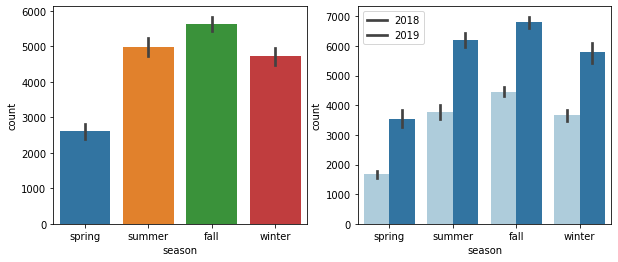

In [57]:
cat_plot('season',10,4)

Observations:
Almost 32% of the bike booking were happening in Fall with a median of more than 5000 bookings in 2018 and 2019. 
It is followed by Summer & Winter with 27% & 25% of total booking.
This indicates that the season can be a good predictor of the dependent variable.

In [65]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cat_stats('month').reindex(month_order, axis=0)

,sum,mean,count,median,sum_%
month,,,,,
Jan,134933,2176.34,62,1939.0,4.10
Feb,149518,2669.96,56,2438.5,4.54
Mar,228920,3692.26,62,3216.5,6.96
Apr,269094,4484.90,60,4293.5,8.18
May,331686,5349.77,62,4890.5,10.08
June,346342,5772.37,60,5308.5,10.52
July,344948,5563.68,62,5446.5,10.48
Aug,351194,5664.42,62,5229.5,10.67
Sep,345991,5766.52,60,5384.0,10.51


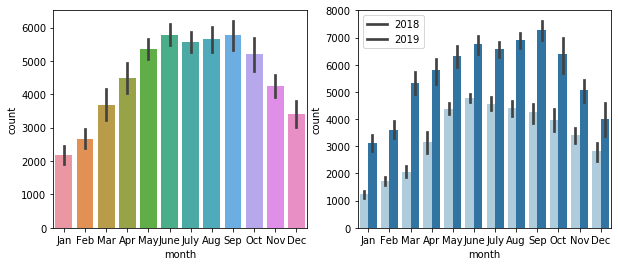

In [66]:
cat_plot('month',10,4)

Observations:

Almost 10% of the bike booking was happening in the months from May to Sep with a median of over 4500 bookings per month. 
This shows that the month has some role here for bookings and can act as a good predictor for the dependent variable.

In [68]:
cat_stats('holiday')

,sum,mean,count,median,sum_%
holiday,,,,,
0,3212410,4530.9,709,4563,97.62
1,78435,3735.0,21,3351,2.38


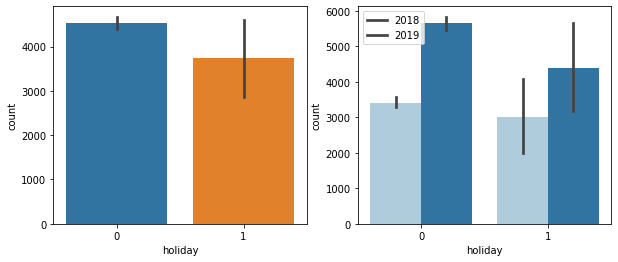

In [69]:
cat_plot('holiday',10,4)

observation:

97% of bike demand is on non - holiday.

In [70]:
weekday_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
cat_stats('weekday').reindex(weekday_order, axis=0)

,sum,mean,count,median,sum_%
weekday,,,,,
Sun,485235,4665.72,104,4590.5,14.74
Mon,447281,4259.82,105,4511.0,13.59
Tue,448822,4274.50,105,4381.0,13.64
Wed,462276,4444.96,104,4350.0,14.05
Thu,487923,4691.57,104,4676.0,14.83
Fri,478132,4597.42,104,4642.5,14.53
Sat,481176,4626.69,104,4572.0,14.62


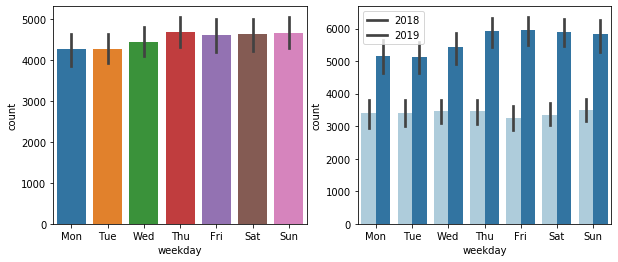

In [71]:
cat_plot('weekday',10,4)

Observation:
    
The demand is almost same on all days of the week.Median between 4000 to 5000. 

This variable can have a very less or no impact on the predictor. 
Further analysis would be needed to determine whether this attribute needs to be included in the model parameter selection.

In [72]:
cat_stats('workingday')

,sum,mean,count,median,sum_%
workingday,,,,,
1,2253988,4472.20,504,4544.5,68.49
0,1036857,4587.86,226,4572.0,31.51


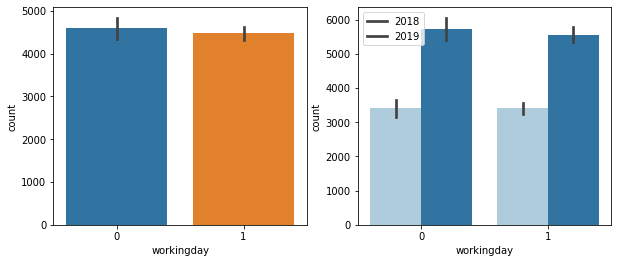

In [73]:
cat_plot('workingday',10,4)

Observation:

Almost 69% of the bike booking were happening in 'workingday' with a median of close to 5000 bookings. 
It shows that the workingday can be a good predictor of the dependent variable.

In [75]:
cat_stats('weather_condition')

,sum,mean,count,median,sum_%
weather_condition,,,,,
Clear + Few Clouds,2257952,4876.79,463,4844,68.61
Mist + Cloudy,995024,4044.81,246,4043,30.24
Light Snow,37869,1803.29,21,1817,1.15


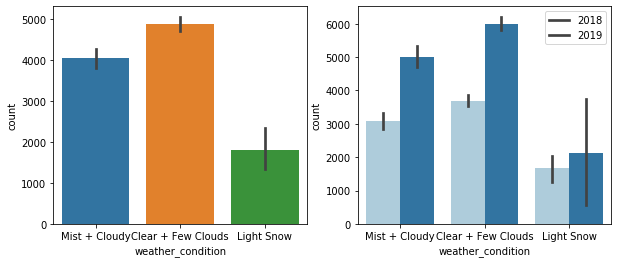

In [76]:
cat_plot('weather_condition',10,4)

Observation:
Almost 68.6% of the bike booking happened during Clear weather with a median of close to 5000 bookings (for two years). 
Then it is followed by Misty with 30% of the total booking. 

This indicates that weather condition has come influence on the dependent variable.

Please note that the bike dataset does not have any records for heavy rain.

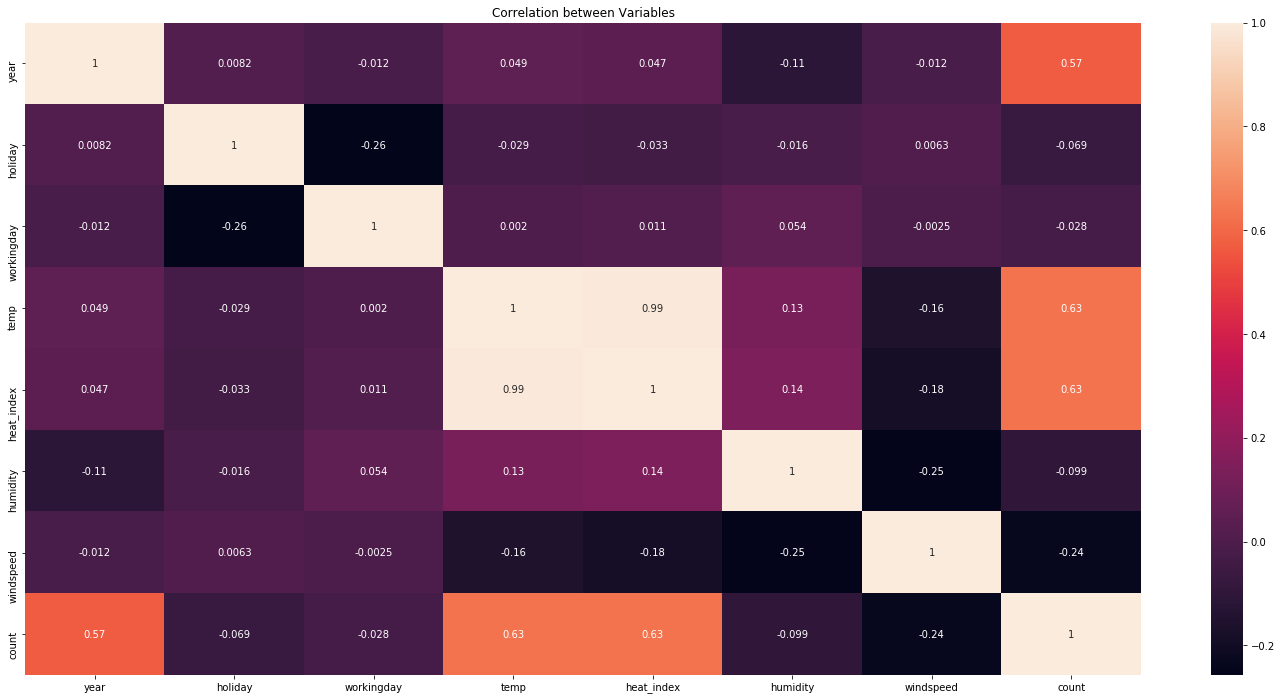

In [86]:
# Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(),annot = True)
plt.title("Correlation between Variables")
plt.show()

# Creating Dummy variable
1. season 
2. month
3. weekday
4. weather_condition

In [15]:
season_1 = pd.get_dummies(bike['season'],drop_first = True)
month_1 = pd.get_dummies(bike['month'],drop_first = True)
weekday_1 = pd.get_dummies(bike['weekday'],drop_first = True)
weather_condition_1 = pd.get_dummies(bike['weather_condition'],drop_first = True)


In [16]:
# Concatenating dummy variables to the original bike dataset.
bike=pd.concat([bike,season_1,month_1,weekday_1,weather_condition_1],axis=1)
bike.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,heat_index,humidity,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear + Few Clouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear + Few Clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear + Few Clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Dropping the redundant field which corresponds to dummy variables.
bike = bike.drop(columns = ['season','month','weekday','weather_condition'],axis = 1)
bike.head()

,year,holiday,workingday,temp,heat_index,humidity,windspeed,count,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting dataset into training and testing set.

In [18]:
df_train,df_test = train_test_split(bike,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [91]:
df_train.head()

,year,holiday,workingday,temp,heat_index,humidity,windspeed,count,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,1,0,0,0,0,1


#### Numerical fields for scaling ->
1. temp
2. heat_index
3. humidity
4. windspeed
5. count
6. casual
7. registered

In [19]:
# Scaling
scaler = MinMaxScaler()
num_vars = ['temp','heat_index','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,heat_index,humidity,windspeed,count,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [90]:
bike.columns

Index(['year', 'holiday', 'workingday', 'temp', 'heat_index', 'humidity',
       'windspeed', 'count', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb',
       'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

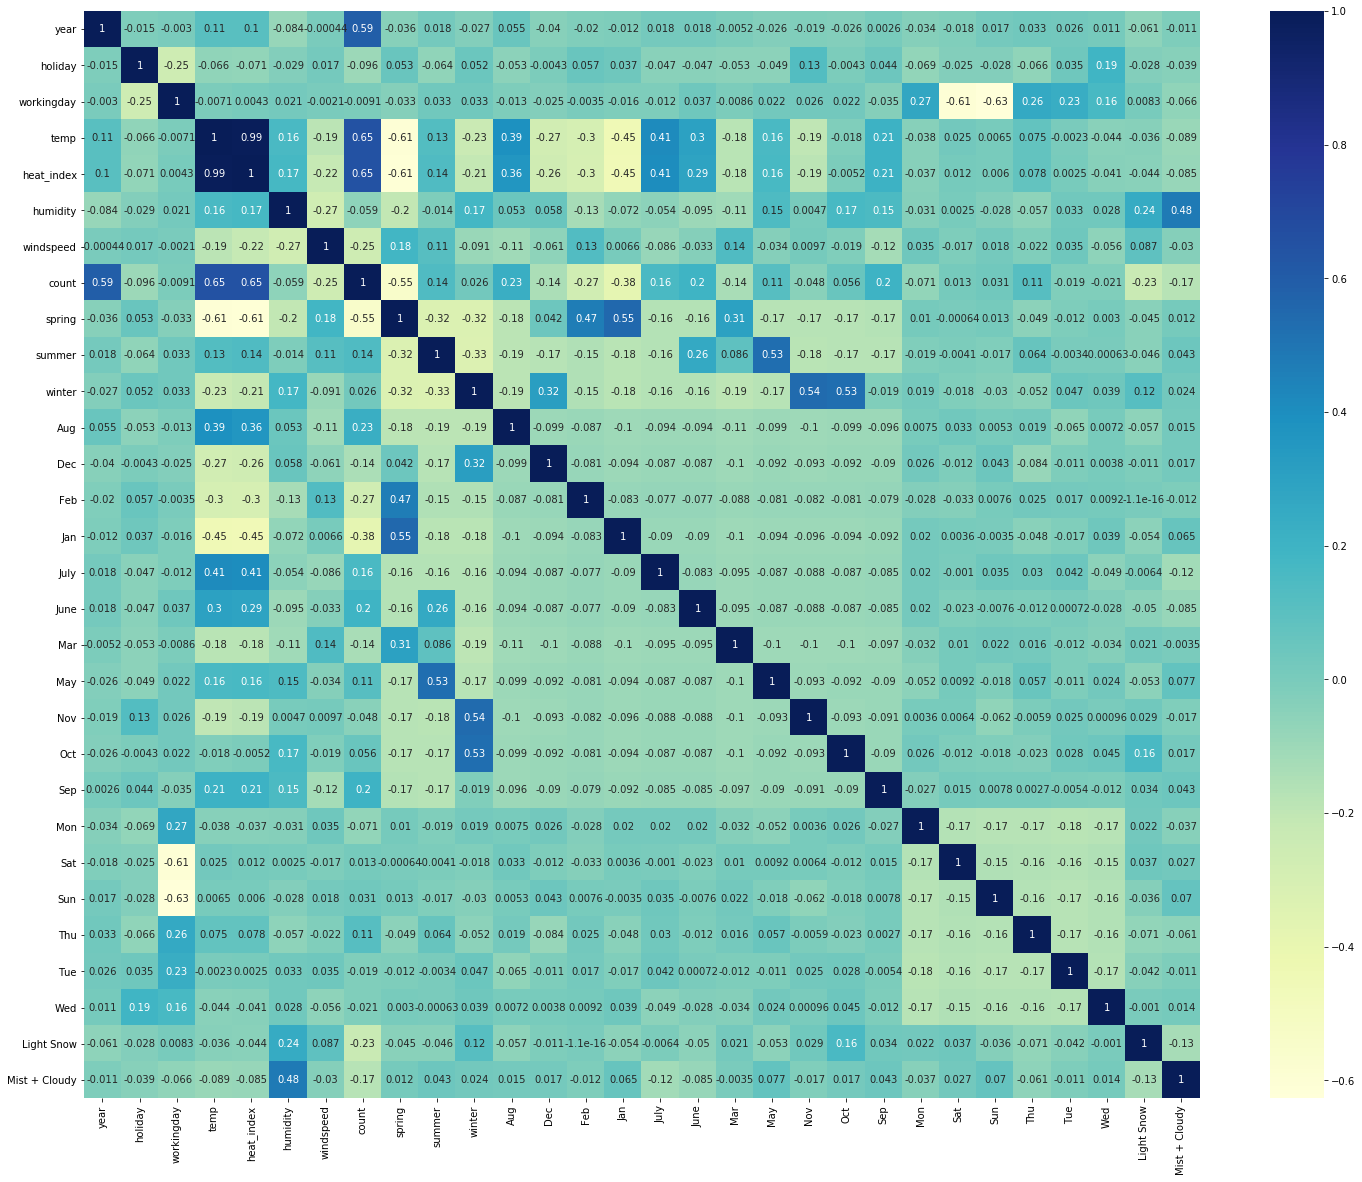

In [32]:
# heat map

plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(),annot = True,cmap = 'YlGnBu')
plt.show()

In [20]:
# Correlation between heat_index and temp is very high which is 0.99.
# dropping temp column

df_train.drop(['temp'],axis=1,inplace=True)

In [21]:
# X_train, y_train

y_train = df_train.pop('count')
X_train = df_train

### Feature Selection - RFE

In [22]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
X_train.shape

(510, 28)

In [23]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [24]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('heat_index', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 11),
 ('June', False, 7),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 3),
 ('Sun', False, 4),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [25]:
# Get the list of columns which RFE supports True

col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'heat_index', 'humidity', 'windspeed', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Nov', 'Sep', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [26]:
# column list which RFE support is False
X_train.columns[~rfe.support_]

Index(['workingday', 'spring', 'July', 'June', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [27]:
## Get the list of columns which RFE supports True and filter and save it in a separate dataset
X_train_rfe = X_train[col]

In [28]:
# add constant
X_train_rfe_1 = sm.add_constant(X_train_rfe)

In [29]:
# create first model
lr_1 = sm.OLS(y_train,X_train_rfe_1).fit()

In [103]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          2.92e-186
Time:                        16:05:54   Log-Likelihood:                 508.08
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     494   BIC:                            -916.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2931      0.032      9.260      0.000       0.231       0.355
year              0.2312      0.008     28.305      0.000       0.215       0.247
holiday          -0.0837      0.026     -3.226      0.001      -0.135      -0.033
heat_index        0.4782      0.032     14.978      0.000       0.415       0.541
humidity         -0.1647      0.038     -4.329      0.000      -0.239      -0.090
windspeed        -0.1771      0.026     -6.783      0.000      -0.228      -0.126
summer            0.0793      0.013      6.295      0.000       0.055       0.104
winter            0.1342      0.014      9.373      0.000       0.106       0.162
Aug               0.0606      0.016      3.695      0.000       0.028       0.093
Dec              -0.0486      0.019     -2.622      0.009      -0.085      -0.012
Feb              -0.0497      0.021     -2.348      0.019      -0.091      -0.008
Jan              -0.0762      0.021     -3.577      0.000      -0.118      -0.034
Nov              -0.0417      0.019     -2.186      0.029      -0.079      -0.004
Sep               0.1121      0.017      6.709      0.000       0.079       0.145
Light Snow       -0.2404      0.027     -9.000      0.000      -0.293      -0.188
Mist + Cloudy    -0.0554      0.011     -5.240      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       66.914   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.141
Skew:                          -0.671   Prob(JB):                     3.08e-37
Kurtosis:                       5.472   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Calculate the VIFs for the FIRST model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,25.06
2,heat_index,14.42
4,windspeed,3.90
6,winter,3.04
5,summer,2.29
14,Mist + Cloudy,2.24
0,year,2.06
10,Jan,1.92
11,Nov,1.87
8,Dec,1.64


In [31]:
# Removing Nov as it is having high p value (> 0.005)

X_train_rfe.drop(['Nov'], axis = 1,inplace = True)

In [32]:
# Building model 2 
X_train_rfe_2 = sm.add_constant(X_train_rfe)

lr_2 = sm.OLS(y_train,X_train_rfe_2).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.25e-186
Time:                        15:36:59   Log-Likelihood:                 505.63
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2793      0.031      8.971      0.000       0.218       0.340
year              0.2311      0.008     28.184      0.000       0.215       0.247
holiday          -0.0906      0.026     -3.502      0.001      -0.141      -0.040
heat_index        0.4954      0.031     15.944      0.000       0.434       0.556
humidity         -0.1648      0.038     -4.315      0.000      -0.240      -0.090
windspeed        -0.1764      0.026     -6.733      0.000      -0.228      -0.125
summer            0.0831      0.013      6.633      0.000       0.058       0.108
winter            0.1213      0.013      9.263      0.000       0.096       0.147
Aug               0.0613      0.016      3.726      0.000       0.029       0.094
Dec              -0.0317      0.017     -1.874      0.061      -0.065       0.002
Feb              -0.0406      0.021     -1.952      0.051      -0.082       0.000
Jan              -0.0660      0.021     -3.163      0.002      -0.107      -0.025
Sep               0.1172      0.017      7.060      0.000       0.085       0.150
Light Snow       -0.2362      0.027     -8.832      0.000      -0.289      -0.184
Mist + Cloudy    -0.0547      0.011     -5.157      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       60.879   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.736
Skew:                          -0.619   Prob(JB):                     3.06e-33
Kurtosis:                       5.348   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Calculate the VIFs for the SECOND model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,24.44
2,heat_index,14.00
4,windspeed,3.84
6,winter,2.40
5,summer,2.27
13,Mist + Cloudy,2.22
0,year,2.06
10,Jan,1.88
7,Aug,1.60
9,Feb,1.52


In [34]:
# Removing Dec as it is having high p value (> 0.005)

X_train_rfe.drop(['Dec'], axis = 1,inplace = True)

In [35]:
# Building model 3  and seeing stats data

X_train_rfe_3 = sm.add_constant(X_train_rfe)

lr_3 = sm.OLS(y_train,X_train_rfe_3).fit()

lr_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.1
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          8.93e-187
Time:                        15:37:09   Log-Likelihood:                 503.83
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     496   BIC:                            -920.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2654      0.030      8.755      0.000       0.206       0.325
year              0.2308      0.008     28.085      0.000       0.215       0.247
holiday          -0.0893      0.026     -3.448      0.001      -0.140      -0.038
heat_index        0.5164      0.029     17.777      0.000       0.459       0.573
humidity         -0.1727      0.038     -4.538      0.000      -0.247      -0.098
windspeed        -0.1721      0.026     -6.578      0.000      -0.224      -0.121
summer            0.0883      0.012      7.211      0.000       0.064       0.112
winter            0.1217      0.013      9.277      0.000       0.096       0.148
Aug               0.0634      0.016      3.851      0.000       0.031       0.096
Feb              -0.0302      0.020     -1.502      0.134      -0.070       0.009
Jan              -0.0534      0.020     -2.697      0.007      -0.092      -0.014
Sep               0.1211      0.017      7.332      0.000       0.089       0.154
Light Snow       -0.2311      0.027     -8.665      0.000      -0.284      -0.179
Mist + Cloudy    -0.0535      0.011     -5.043      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       56.511   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.547
Skew:                          -0.576   Prob(JB):                     8.22e-31
Kurtosis:                       5.278   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Calculate the VIFs for the THIRD model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,21.63
2,heat_index,12.82
4,windspeed,3.83
6,winter,2.39
5,summer,2.20
12,Mist + Cloudy,2.19
0,year,2.05
9,Jan,1.77
7,Aug,1.59
8,Feb,1.46


In [37]:
# Removing Feb as it is having high p value (> 0.005)

X_train_rfe.drop(['Feb'], axis = 1,inplace = True)

In [38]:
# Building model 4
X_train_rfe_4 = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train,X_train_rfe_4).fit()
lr_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.83e-187
Time:                        15:37:17   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     497   BIC:                            -924.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2502      0.029      8.746      0.000       0.194       0.306
year              0.2303      0.008     28.012      0.000       0.214       0.246
holiday          -0.0912      0.026     -3.520      0.000      -0.142      -0.040
heat_index        0.5348      0.026     20.289      0.000       0.483       0.587
humidity         -0.1750      0.038     -4.598      0.000      -0.250      -0.100
windspeed        -0.1724      0.026     -6.579      0.000      -0.224      -0.121
summer            0.0949      0.011      8.298      0.000       0.072       0.117
winter            0.1306      0.012     11.134      0.000       0.108       0.154
Aug               0.0667      0.016      4.084      0.000       0.035       0.099
Jan              -0.0402      0.018     -2.263      0.024      -0.075      -0.005
Sep               0.1241      0.016      7.566      0.000       0.092       0.156
Light Snow       -0.2301      0.027     -8.620      0.000      -0.283      -0.178
Mist + Cloudy    -0.0533      0.011     -5.020      0.000      -0.074      -0.032
==============================================================================
Omnibus:                       53.207   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.194
Skew:                          -0.538   Prob(JB):                     1.97e-29
Kurtosis:                       5.250   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Calculate the VIFs for the FOURTH model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,18.52
2,heat_index,11.47
4,windspeed,3.60
11,Mist + Cloudy,2.16
0,year,2.04
6,winter,2.02
5,summer,1.96
7,Aug,1.56
8,Jan,1.54
9,Sep,1.32


In [40]:
X_train_rfe.drop(['Jan'], axis = 1,inplace = True)

In [41]:
# model 5
X_train_rfe_5 = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train,X_train_rfe_5).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.49e-187
Time:                        15:37:25   Log-Likelihood:                 500.06
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     498   BIC:                            -925.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2306      0.027      8.423      0.000       0.177       0.284
year              0.2293      0.008     27.817      0.000       0.213       0.246
holiday          -0.0918      0.026     -3.530      0.000      -0.143      -0.041
heat_index        0.5619      0.024     23.819      0.000       0.516       0.608
humidity         -0.1817      0.038     -4.769      0.000      -0.257      -0.107
windspeed        -0.1657      0.026     -6.339      0.000      -0.217      -0.114
summer            0.1017      0.011      9.171      0.000       0.080       0.123
winter            0.1412      0.011     13.068      0.000       0.120       0.162
Aug               0.0694      0.016      4.244      0.000       0.037       0.102
Sep               0.1271      0.016      7.736      0.000       0.095       0.159
Light Snow       -0.2265      0.027     -8.464      0.000      -0.279      -0.174
Mist + Cloudy    -0.0532      0.011     -4.992      0.000      -0.074      -0.032
==============================================================================
Omnibus:                       52.152   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.838
Skew:                          -0.517   Prob(JB):                     8.66e-30
Kurtosis:                       5.287   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Calculate the VIFs for the FIFTH model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,14.69
2,heat_index,9.73
4,windspeed,3.58
10,Mist + Cloudy,2.13
0,year,2.01
5,summer,1.84
6,winter,1.74
7,Aug,1.55
8,Sep,1.30
9,Light Snow,1.16


In [43]:
X_train_rfe.drop(['humidity'], axis = 1,inplace = True)

In [44]:
# Model 6
X_train_rfe_6 = sm.add_constant(X_train_rfe)
lr_6 = sm.OLS(y_train,X_train_rfe_6).fit()
lr_6.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          6.05e-184
Time:                        15:37:36   Log-Likelihood:                 488.67
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     499   BIC:                            -908.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1275      0.017      7.429      0.000       0.094       0.161
year              0.2334      0.008     27.867      0.000       0.217       0.250
holiday          -0.0934      0.027     -3.513      0.000      -0.146      -0.041
heat_index        0.5370      0.024     22.850      0.000       0.491       0.583
windspeed        -0.1319      0.026     -5.132      0.000      -0.182      -0.081
summer            0.0990      0.011      8.750      0.000       0.077       0.121
winter            0.1311      0.011     12.114      0.000       0.110       0.152
Aug               0.0679      0.017      4.065      0.000       0.035       0.101
Sep               0.1209      0.017      7.226      0.000       0.088       0.154
Light Snow       -0.2760      0.025    -10.953      0.000      -0.326      -0.227
Mist + Cloudy    -0.0822      0.009     -9.184      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       51.460   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.152
Skew:                          -0.530   Prob(JB):                     1.10e-27
Kurtosis:                       5.172   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Calculate the VIFs for the SIXTH model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,heat_index,4.92
3,windspeed,3.05
0,year,2.00
4,summer,1.83
6,Aug,1.55
5,winter,1.50
9,Mist + Cloudy,1.49
7,Sep,1.30
8,Light Snow,1.08
1,holiday,1.04


### Residual Analysis

In [46]:
y_train_cnt = lr_6.predict(X_train_rfe_6)

In [47]:
res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

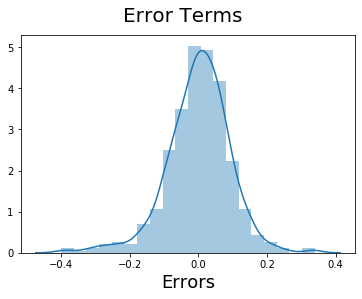

In [48]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

In [83]:
# Scaling test data

num_vars = ['temp','heat_index','humidity','windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,heat_index,humidity,windspeed,count,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [125]:
df_test.describe()

,year,holiday,workingday,temp,heat_index,humidity,windspeed,count,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
# Test x and y variables
y_test = df_test.pop('count')
X_test = df_test

In [85]:
# Adding a constant variable 
X_test_new = X_test[X_train_rfe.columns]


In [86]:
X_test_sm = sm.add_constant(X_test_new)

In [135]:
X_test_sm.columns

Index(['const', 'year', 'holiday', 'heat_index', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [87]:
# Making predictions
y_pred = lr_6.predict(X_test_sm)

#### Model Evaluation


Text(0, 0.5, 'y_pred')

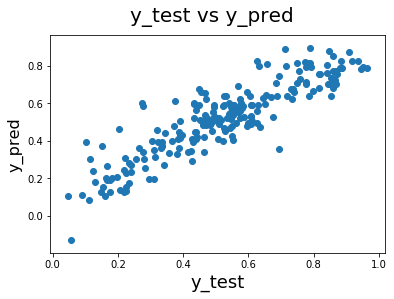

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [92]:
# evaluate
r2_score(y_true = y_test,y_pred = y_pred)

0.79425209298371

In [91]:
# Calculate adjusted R-squared with formula as belo
# adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

adjusted_r2 = 1-(1-0.794)*(n-1)/(n-p-1)
adjusted_r2

0.7841435406698565

Results:
1. Train set:
        
->R - squared :0.829

->Adj. R - squared :0.825
2. Test set:
        
->R - squared :0.794

->Adj. R - squared :0.784

The above data shows the model is very good in terms of predicting unseen data.


We can see that the equation of our best fitted line is :

count = 0.5370 * (heat_index) - 0.1319 * (windspeed) + 0.2334 * (year) + 0.0990 * (summer) + 0.0679 * (Aug) + 0.1311 * (winter) - 0.0822 * (Mist + cloudy) + 0.1209 * (Sep) - 0.2760 * (Light Snow) - 0.0934 * (holiday)


Analysing the above model, the comapny should focus on the below features:
1. year: The company should see an increase in demand when the situation comes back to normal as compared to 2019.
2. season: The company should think of expanding it's business in the Summer and the Fall season.
3. weather: The users prefer to rent a bike when the weather is pleasant.During snow the demand is less.
4. heat index: The users prefer to ride or rent a bike in a moderate temperature.

Hence when the situation comes back to normal, the company should see an increase in the business as compared to previous year 2019 and should focus on expanding it's business by giving new offers specially in the season of summer and fall when the weather is pleasant.

    